# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

##Three Observable Trends Based on Data
1. Latitude and max temperature are correlated - latitude of 20 yields the highest temperatures in the northern hemisphere, a negative correlation.
2. Latitude between 20-30 yields the lowest humidity percentages in the northern hemisphere.
3. Cloudiness vs latitude showed no trend 

In [4]:
!pip install citipy

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_group=[]
lat=[]
lng=[]
max_temp =[]
cloud=[]
hum=[]
wind=[]
country=[]
date=[]


#Loop through the list of cities 

print("Beginning Data Retrieval\n-----------------------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        city_group.append(response['name'])
        print(f"Processing Record {cities.index(city)} of set 1 | {city}")
        
    except(KeyError, IndexError):
        print("Missing field/result....skipping.")
    
print("-----------------------------------\nData Retrieval Complete\n------------------------")
        


Beginning Data Retrieval
-----------------------------------------
Processing Record 0 of set 1 | puerto baquerizo moreno
Processing Record 1 of set 1 | hermanus
Processing Record 2 of set 1 | tasiilaq
Processing Record 3 of set 1 | coahuayana
Processing Record 4 of set 1 | vostok
Processing Record 5 of set 1 | panguna
Processing Record 6 of set 1 | rikitea
Processing Record 7 of set 1 | las palmas
Processing Record 8 of set 1 | saint-leu
Processing Record 9 of set 1 | kavaratti
Processing Record 10 of set 1 | cap-aux-meules
Processing Record 11 of set 1 | constitucion
Processing Record 12 of set 1 | nikolskoye
Processing Record 13 of set 1 | cape town
Processing Record 14 of set 1 | jamestown
Processing Record 15 of set 1 | longyearbyen
Processing Record 16 of set 1 | bluff
Processing Record 17 of set 1 | mouila
Processing Record 18 of set 1 | bundaberg
Processing Record 19 of set 1 | rawson
Processing Record 20 of set 1 | chapleau
Processing Record 21 of set 1 | dikson
Processing Rec

Processing Record 198 of set 1 | griffith
Processing Record 199 of set 1 | lorengau
Processing Record 200 of set 1 | kodiak
Processing Record 201 of set 1 | meulaboh
Processing Record 202 of set 1 | portland
Missing field/result....skipping.
Processing Record 204 of set 1 | butaritari
Processing Record 205 of set 1 | krasnoarmeyskiy
Processing Record 206 of set 1 | khasan
Processing Record 207 of set 1 | vila franca do campo
Processing Record 208 of set 1 | isangel
Processing Record 209 of set 1 | sitka
Processing Record 210 of set 1 | whitehorse
Processing Record 211 of set 1 | honningsvag
Processing Record 212 of set 1 | priladozhskiy
Processing Record 213 of set 1 | flinders
Processing Record 214 of set 1 | hasaki
Processing Record 215 of set 1 | yar-sale
Processing Record 216 of set 1 | nam som
Processing Record 217 of set 1 | victoria
Missing field/result....skipping.
Processing Record 219 of set 1 | pisco
Processing Record 220 of set 1 | khvastovichi
Processing Record 221 of set 

Processing Record 395 of set 1 | clyde river
Processing Record 396 of set 1 | praia da vitoria
Processing Record 397 of set 1 | carballo
Processing Record 398 of set 1 | atar
Missing field/result....skipping.
Processing Record 400 of set 1 | severnoye
Processing Record 401 of set 1 | parainen
Processing Record 402 of set 1 | oksfjord
Processing Record 403 of set 1 | pontianak
Processing Record 404 of set 1 | roebourne
Processing Record 405 of set 1 | krasnoselkup
Processing Record 406 of set 1 | tura
Processing Record 407 of set 1 | tekeli
Processing Record 408 of set 1 | makakilo city
Processing Record 409 of set 1 | harper
Processing Record 410 of set 1 | gambela
Processing Record 411 of set 1 | biltine
Processing Record 412 of set 1 | mecca
Missing field/result....skipping.
Processing Record 414 of set 1 | karratha
Processing Record 415 of set 1 | codrington
Processing Record 416 of set 1 | westport
Processing Record 417 of set 1 | sweetwater
Missing field/result....skipping.
Proces

Processing Record 592 of set 1 | otavi
Processing Record 593 of set 1 | kirakira
Processing Record 594 of set 1 | cayhagan
Processing Record 595 of set 1 | totness
Processing Record 596 of set 1 | bograd
Processing Record 597 of set 1 | plettenberg bay
Processing Record 598 of set 1 | virginia beach
Processing Record 599 of set 1 | les cayes
Processing Record 600 of set 1 | goreloye
Processing Record 601 of set 1 | progreso
Processing Record 602 of set 1 | jiuquan
Processing Record 603 of set 1 | port augusta
Processing Record 604 of set 1 | laramie
Processing Record 605 of set 1 | berdigestyakh
Processing Record 606 of set 1 | taksimo
-----------------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
weather_dict = {
    "City": city_group,
    "Lat": lat,
    "Lng":lng,
    "Max temp":max_temp,
    "Humidity":hum,
    "Cloudiness":cloud,
    "Wind speed": wind, 
    "Country":country,
    "Date":date}


In [9]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Puerto Baquerizo Moreno,-0.90,-89.60,73.40,78,75,14.99,EC,1595453586
1,Hermanus,-34.42,19.23,54.00,92,0,3.85,ZA,1595453345
2,Tasiilaq,65.61,-37.64,42.80,87,35,5.82,GL,1595453586
3,Coahuayana Viejo,18.73,-103.68,88.54,60,98,6.98,MX,1595453586
4,Vostok,46.49,135.88,64.11,94,97,1.12,RU,1595453515


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
clean_data = weather_data[weather_data["Humidity"] > 100]
clean_data 

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind speed,Country,Date


In [11]:
#  Get the indices of cities that have humidity over 100%.
indices = weather_data.index[weather_data['Humidity'] > 100].tolist() to list
indices


[]

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_data.to_csv(r'out.csv', index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

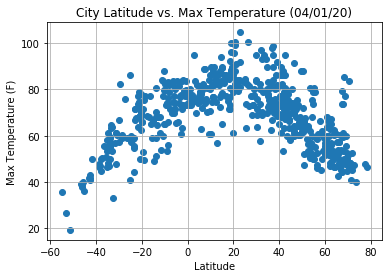

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = weather_data['Lat']
y_values = weather_data['Max temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()
plt.tight_layout()
plt.savefig("City Lat vs Max temp.png")

## Latitude vs. Humidity Plot

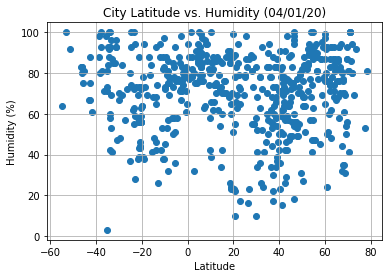

<Figure size 432x288 with 0 Axes>

In [42]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
plt.tight_layout()
plt.savefig("Lat vs Hum.png")

## Latitude vs. Cloudiness Plot

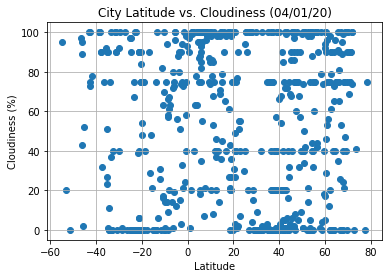

<Figure size 432x288 with 0 Axes>

In [43]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
plt.tight_layout()
plt.savefig("Lat vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

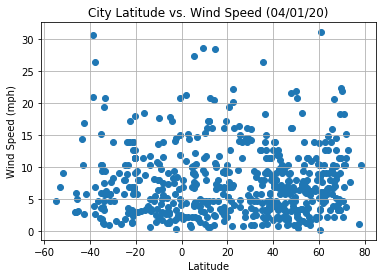

<Figure size 432x288 with 0 Axes>

In [44]:
x_values = weather_data['Lat']
y_values = weather_data['Wind speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()
plt.tight_layout()
plt.savefig("Lat vs Wind Speed.png")

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots


In [19]:
# Create Northern and Southern Hemisphere DataFrames
southern_hemisphere = weather_data[weather_data["Lat"] < 0]
northern_hemisphere = weather_data[weather_data["Lat"] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46173073771370277


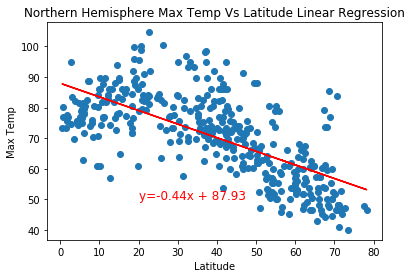

<Figure size 432x288 with 0 Axes>

In [45]:
# Create Plot
x_values_1 = northern_hemisphere["Lat"]
y_values_1 = northern_hemisphere["Max temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Northern Hemisphere Max Temp Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
plt.savefig("Northern Max temp vs lat linear reg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6096106565942393


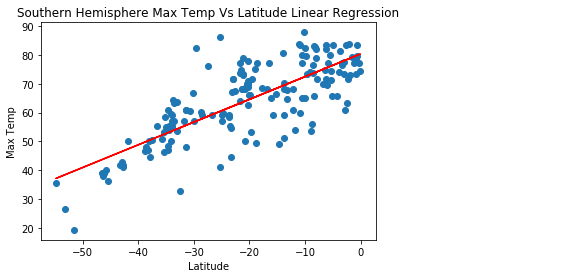

<Figure size 432x288 with 0 Axes>

In [46]:
# Create Plot
x_values_1 = southern_hemisphere["Lat"]
y_values_1 = southern_hemisphere["Max temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Southern Hemisphere Max Temp Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
plt.savefig("Southern Max temp vs lat linear reg.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00032521008587004066


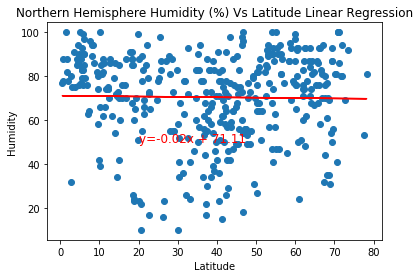

<Figure size 432x288 with 0 Axes>

In [47]:
# Create Plot
x_values_1 = northern_hemisphere["Lat"]
y_values_1 = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Northern Hemisphere Humidity (%) Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.savefig("Northern Humidity vs lat linear reg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.020784054497119023


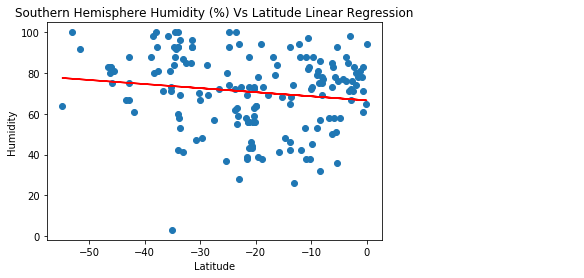

<Figure size 432x288 with 0 Axes>

In [48]:
# Create Plot
x_values_1 = southern_hemisphere["Lat"]
y_values_1 = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Southern Hemisphere Humidity (%) Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.savefig("Southern Humidity vs lat linear reg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006775376235097079


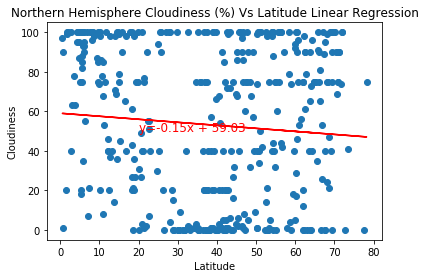

<Figure size 432x288 with 0 Axes>

In [49]:
# Create Plot
x_values_1 = northern_hemisphere["Lat"]
y_values_1 = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Northern Hemisphere Cloudiness (%) Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.savefig("Northern Cloudiness vs lat linear reg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00016750531601208762


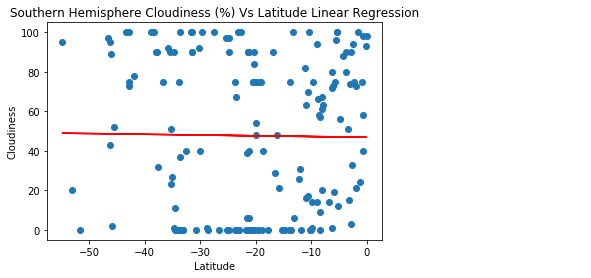

<Figure size 432x288 with 0 Axes>

In [50]:
# Create Plot
x_values_1 = southern_hemisphere["Lat"]
y_values_1 = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Southern Hemisphere Cloudiness (%) Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.savefig("Southern Cloudiness vs lat linear reg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00012413038514107595


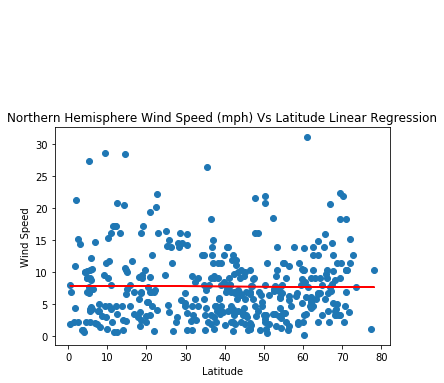

<Figure size 432x288 with 0 Axes>

In [51]:
# Create Plot
x_values_1 = northern_hemisphere["Lat"]
y_values_1 = northern_hemisphere["Wind speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Northern Hemisphere Wind Speed (mph) Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("Northern Wind speed vs lat linear reg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004332999927243675


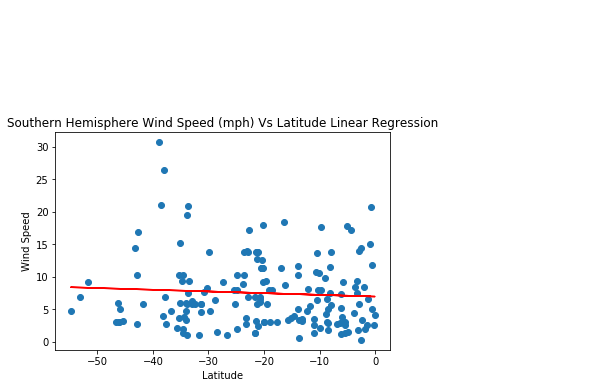

<Figure size 432x288 with 0 Axes>

In [52]:
# Create Plot
x_values_1 = southern_hemisphere["Lat"]
y_values_1 = southern_hemisphere["Wind speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Southern Hemisphere Wind Speed (mph) Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("Southern Wind speed vs lat linear reg.png")